
# Linear Regression

by Emil Vassev

September 17, 2022
<br><br>
Copyright (C) 2022 - All rights reserved, do not copy or distribute without permission of the author.
***

# Getting Familiar with Linear Regression by Using scipy 
Linear regression is a statistical method to find a line that most approximates the target values.

## Step 1. Collect Data

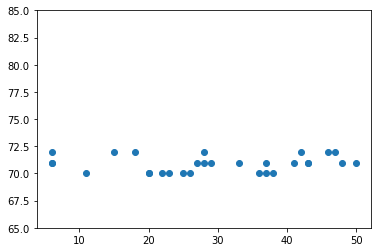

In [1]:
import matplotlib.pyplot as plt
import random

x = []
y = []

for i in range(1,30):
    n = random.randint(1,50)
    x.append(n)
    n = random.randint(70,72)
    y.append(n)

plt.ylim([65, 85])
plt.scatter(x, y)
plt.show()

## Step 2. Import stats

In [2]:
from scipy import stats

## Step 3. Execute linregress 
* *linregress()* - a method provided by *scypy.stats* that finds a *regression line* for a given set of points
* we execute the *linregress* method - it returns some important key values of the Linear Regression

In [3]:
slope, intercept, r, p, std_err = stats.linregress(x, y)

*slope* = 𝛽<sub>1</sub><br>

In [4]:
print(slope)

0.0065422535211267585


*intercept* = 𝛽<sub>0</sub>

In [5]:
print(intercept)

70.70457042253521


*correlation coefficient* **r**: a number between -1 and 1 (-1 ≤ r ≤ 1):
<ul>
<li>a value of r close to -1: means that there is negative correlation between the variables (when one increases the other decreases and vice versa)</li>
<li>a value of r close to 0: indicates that the variables are not correlated (no linear relationship exists between them)</li>
<li>a value of r close to 1: indicates a positive linear relationship between variables (when one increases, the other does too)</li>
</ul>

In [6]:
print(r)

0.11205954660714589


*p-value* **p**: determines the probability of whether the relationships that we observe in our sample also exist in a larger population 

In [7]:
print(p)

0.562762993303608


*standard error* **std_err**: 
* determines how is the data fit - higher values mean less precision
* the standard error of the estimated intercept, under the assumption of residual normality

In [8]:
print(std_err)

0.011164841680207484


## Step 4. Create the Linear Regression Function
Create the linear regressio function:
* 𝑦 = 𝛽<sub>0</sub>+ 𝛽<sub>1</sub>∗𝑥 

This function uses the **intercept** 𝛽<sub>0</sub> and **slope** 𝛽<sub>1</sub> values to return the 𝑦 value. The returned 𝑦  value represents where on the y-axis the corresponding 𝑥 value will be placed.

In [9]:
def prduceY(x):
  return slope * x + intercept

## Step 5. Run the Linear Regression Function on x
Run each value of the x array through the function. This will result in a new array with new values for the y-axis.

In [10]:
lr_model = list(map(prduceY, x))

## Step 6. Plot the Linear Regression

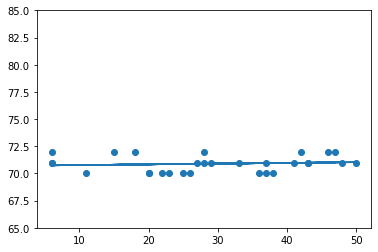

In [11]:
plt.ylim([65, 85])
plt.scatter(x, y)
plt.plot(x, lr_model)
plt.show()

# Simple Linear Regression With scikit-learn
A scikit-learn linear regression script begins by importing the LinearRegression class.

In [12]:
from sklearn.linear_model import LinearRegression

## Case 1: Randomly-Generated Data

In [13]:
print(x)
print(y)

[20, 50, 11, 22, 27, 23, 36, 6, 46, 18, 15, 41, 47, 43, 28, 25, 33, 6, 43, 48, 37, 28, 6, 20, 26, 29, 42, 37, 38]
[70, 71, 70, 70, 71, 70, 70, 71, 72, 72, 72, 71, 72, 71, 71, 70, 71, 72, 71, 71, 70, 72, 71, 70, 70, 71, 72, 71, 70]


### Step 1. Pre-process Data

Scikit-Learn's linear regression model expects a 2D input for **x**, and x is currenlty an 1D array. <br><br>
We use numpy to reshape an 1D NumPy array to a 2D NumPy array.

In [14]:
import numpy as np

In [15]:
x = np.array(x).reshape((-1, 1)) #reshapes an 1D NumPy array to a 2D NumPy array; x needs to be 2D - features with values
y = np.array(y)

### Step 2. Train Model

We don't split the dataset into a train and test datasets, because it is too small. We train on the entire dataset. 

In [16]:
lr = LinearRegression()

In [17]:
lr.fit(x, y)

LinearRegression()

If no errors are thrown, then the regressor found the best fitting line.<br><br>
The line is defined by **x** and **y** (the features), and by the **intercept** and **slope**. In fact, we can inspect both the **intercept** and **slope** from the `lr.intecept_` and `lr.coef_` attributes, respectively.

In [18]:
print(f"intercept: {lr.intercept_}")

print(f"slope: {lr.coef_}")

intercept: 70.70457042253521
slope: [0.00654225]


In [19]:
sq = lr.score(x, y)
print(f"coefficient of determination: {sq}")

coefficient of determination: 0.012557341985803272


### Step 3. Draw Linear Regression Line

We use the previously-defined Linear Regression function `prduceY(x)` to generate **y** values for the line:
```python
def prduceY(x):
  return slope * x + intercept
```

In [20]:
intercept = lr.intercept_
slope = lr.coef_
lr_model = list(map(prduceY, x))

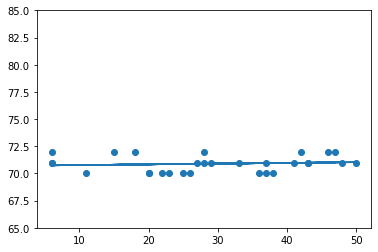

In [21]:
plt.ylim([65, 85])
plt.scatter(x, y)
plt.plot(x, lr_model)
plt.show()

### Step 4. Make Predictions

In [22]:
y_pred = lr.predict(x)

In [23]:
print(y)

[70 71 70 70 71 70 70 71 72 72 72 71 72 71 71 70 71 72 71 71 70 72 71 70
 70 71 72 71 70]


In [24]:
print(y_pred)

[70.83541549 71.0316831  70.77653521 70.8485     70.88121127 70.85504225
 70.94009155 70.74382394 71.00551408 70.82233099 70.80270423 70.97280282
 71.01205634 70.98588732 70.88775352 70.86812676 70.92046479 70.74382394
 70.98588732 71.01859859 70.9466338  70.88775352 70.74382394 70.83541549
 70.87466901 70.89429577 70.97934507 70.9466338  70.95317606]


### Step 5. Evaluate Model

In [25]:
from sklearn import metrics
print(metrics.r2_score(y, y_pred))

0.012557341985803272


## Case 2: Real-Life Scenario

The example data we’re going to analyze is a relative *sales performance* of the sector “Computer and Technology” to the sector “Business Services”. The ratio “Computer and Technology”/“Business Services" determines the relative sales performance per date.
<br><br>
Data taken from: https://drive.google.com/file/d/1Cd2ibwcPYFZPw-wl_Cfjr2Jmo1ziI8mc/view?usp=sharings
<br><br>
*Objective*: Train and test a Linear Regression model to predict the relative sales performance. 

### Step 1. Load Data

In [26]:
import pandas as pd

url_csv = 'https://raw.githubusercontent.com/evassev/CS6501_SEM2_2022/main/Lessons/data/relative_price_change_CTtoBS_table.csv'

#df = pd.read_csv('data\\relative_price_change_CTtoBS_table.csv')

df = pd.read_csv(url_csv)

In [27]:
df.head(10)

,date,relative_price_change_CTtoBS
0,2020-01-02,1.000000
1,2020-01-03,0.994549
2,2020-01-06,0.999416
3,2020-01-07,1.004152
4,2020-01-08,1.002922
5,2020-01-09,1.004308
6,2020-01-10,1.002880
7,2020-01-13,1.006260
8,2020-01-14,1.006481
9,2020-01-15,0.995184


In [28]:
df.shape

(327, 2)

### Step 2. Plot Data

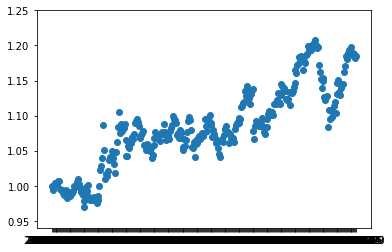

In [29]:
plt.ylim([0.94, 1.25])
plt.scatter(df['date'], df['relative_price_change_CTtoBS'])
plt.show()

We can sometimes find a pattern on a graph in financial analysis. If the pattern/shape of the graph is close to a line, we apply linear regression. The graph above shows the relative sales performance, and you can see that it’s close to linear.

### Step 3. Pre-process Data

ML works with numerical data only. Aa we can see, the "date" feature is not numerical.

In [30]:
df.dtypes

date                             object
relative_price_change_CTtoBS    float64
dtype: object

We convert a time-series data to a series of numbers.

In [31]:
date_unique = df['date'].unique()
class_mapper = {}
num = 0
for element in date_unique:
    num += 1
    class_mapper[element] = num
    
df['date'] = df['date'].replace(class_mapper)  

In [32]:
df.head(10)

,date,relative_price_change_CTtoBS
0,1,1.000000
1,2,0.994549
2,3,0.999416
3,4,1.004152
4,5,1.002922
5,6,1.004308
6,7,1.002880
7,8,1.006260
8,9,1.006481
9,10,0.995184


### Step 4. Train Model

We use the **train_test_split** function to split the dataset into a training and testing sets.<br><br>
The independent variable x is the date feature, and the dependent variable y is the price ratio.

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
Y = df.iloc[:, df.columns.get_loc('relative_price_change_CTtoBS')]
X = df.loc[:, df.columns != 'relative_price_change_CTtoBS']

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [36]:
print(X_train)

     date
1       2
298   299
8       9
213   214
101   102
..    ...
251   252
192   193
117   118
47     48
172   173

[261 rows x 1 columns]


In [37]:
print(Y_train)

1      0.994549
298    1.094579
8      1.006481
213    1.131401
101    1.051574
         ...   
251    1.123541
192    1.068596
117    1.074146
47     0.979618
172    1.069750
Name: relative_price_change_CTtoBS, Length: 261, dtype: float64


In [38]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

### Step 5. Draw Linear Regression Line

If no errors are thrown by the `lr.fit(X_train, Y_train)` method, then the regressor found the best fitting line.<br><br>
The line is defined by **x** and **y** (the features), and by the **intercept** and **slope**. We can inspect both the **intercept** and **slope** from the `lr.intecept_` and `lr.coef_` attributes, respectively.

In [39]:
intercept = lr.intercept_
slope = lr.coef_

We use the previously-defined Linear Regression function `prduceY(x)` to generate **y** values for the line:
```python
def prduceY(x):
  return slope * x + intercept
```

In [40]:
lr_model = list(map(prduceY, df['date']))

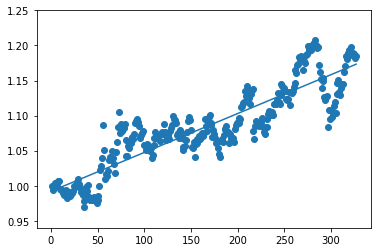

In [41]:
plt.ylim([0.94, 1.25])
plt.scatter(df['date'], df['relative_price_change_CTtoBS'])
plt.plot(df['date'], lr_model)
plt.show()

### Step 6. Make Predictions

In [42]:
Y_pred = lr.predict(X_test)

### Step 7. Evaluate Model
After looking at the data, seeing a linear relationship, training and testing our model, we can understand how well it predicts by using some metrics. We can use the standard `metrics.r2_score()` method to compare *Y_test* and *Y_pred*.

In [43]:
from sklearn import metrics
print(metrics.r2_score(Y_test,Y_pred))

0.8070774218375065


In [44]:
print(Y_test)

122    1.064674
66     1.039493
142    1.066175
245    1.129208
146    1.091940
         ...   
234    1.100208
74     1.088447
52     1.021727
235    1.100239
214    1.136850
Name: relative_price_change_CTtoBS, Length: 66, dtype: float64


In [45]:
print(Y_pred)

[1.06015067 1.02910122 1.07123976 1.12834857 1.07345758 1.02743785
 1.14110103 1.00082404 1.06791303 1.07234867 1.14220994 1.02522004
 1.00692304 1.03021013 1.11005158 1.13056639 1.07955658 1.05238831
 1.02577449 1.16937821 1.10838821 1.12114067 1.08676449 1.1560713
 1.16771484 1.15828912 1.16272475 1.11393276 1.14331885 1.08731894
 1.09674467 1.12446739 1.11448721 0.9963884  0.99583395 1.02355667
 1.02300222 1.00470522 1.05904176 1.02799231 1.15551684 1.00415077
 1.06680412 1.13721985 0.99916068 1.11559612 1.08011103 1.08565558
 1.04906158 1.05682394 1.00193295 1.07013085 1.03464576 1.12945748
 1.04795267 1.09785358 1.09452685 1.02854676 1.03741804 1.16327921
 1.07733876 1.12224957 1.03353685 1.02133886 1.12280403 1.11116048]


For Linear Regression, other evaluation metrics are mainly used:
* *Mean Squared Error (MSE)*: Squares the absolute values of the errors. Also, as with MAE, the smaller, or closer to 0, the better. The MSE value is squared so as to make large errors even larger. One thing to pay close attention to, it that it is usually a hard metric to interpret due to the size of its values and of the fact that they aren't in the same scale of the data.
<div>
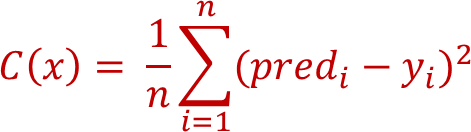
</div>

* *Root Mean Squared Error (RMSE)*: Tries to solve the interpretation problem raised with the MSE by getting the square root of its final value, so as to scale it back to the same units of the data. It is easier to interpret and good when we need to display or show the actual value of the data with the error. It shows how much the data may vary, so, if we have an RMSE of 0.02, our model can make an error either because it added 0.02 to the actual value, or needed 0.02 to get to the actual value. The closer to 0, the better as well.
<div>
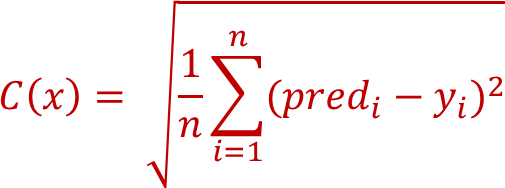
</div>

* *Mean Absolute Error (MAE)*: When we subtract the predicted values from the actual values, obtaining the errors, sum the absolute values of those errors and get their mean. This metric gives a notion of the overall error for each prediction of the model, the smaller (closer to 0) the better.
<div>
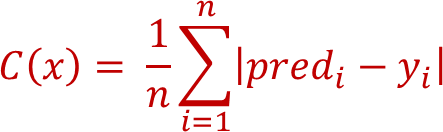
</div>

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [47]:
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, Y_pred)

In [48]:
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'Mean absolute error: {mae:.2f}')

Mean squared error: 0.00
Root mean squared error: 0.02
Mean absolute error: 0.02


All the errors are low - and we're missing the actual value by 0.02 (MAE) at most (lower or higher), which is a pretty small range considering the data we have.